# GPU performance for fashion mnist dataset

https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Data Ingestion

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
len(train_images), len(train_labels)

(60000, 60000)

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Data Visualization

(60000, 28, 28)
AxesImage(shape=(28, 28))
9
Ankle boot


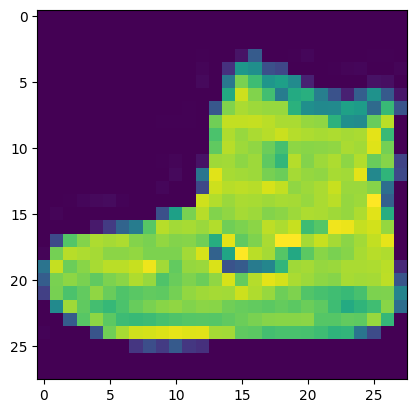

In [18]:
print(train_images.shape)

print(plt.imshow(train_images[0]))

print(train_labels[0])

print(class_names[train_labels[0]])

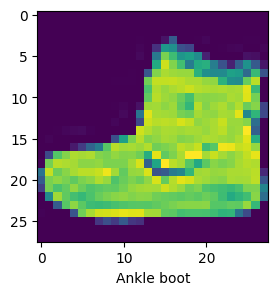

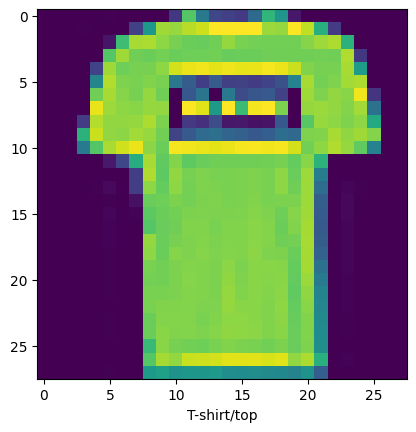

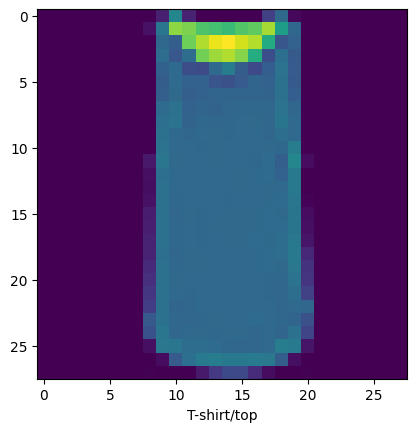

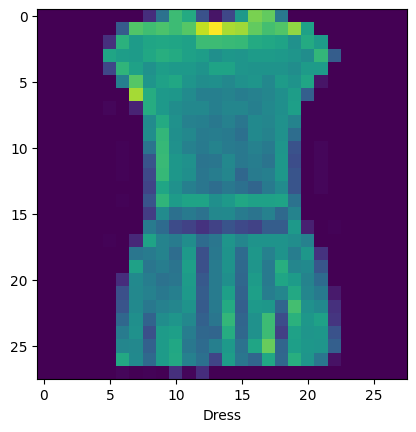

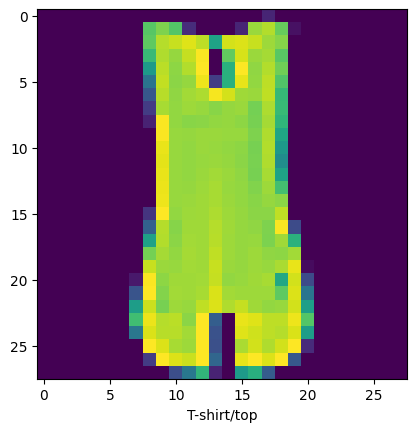

In [19]:
plt.figure(figsize=(3, 3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

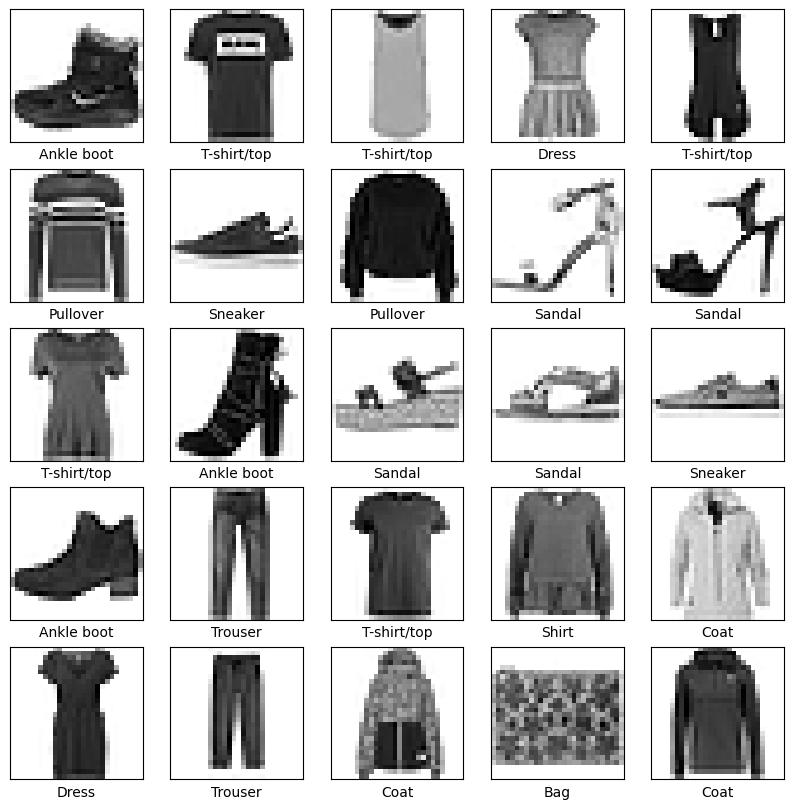

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Data Pre-processing

In [21]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

## Model

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 28*28 = 784
    keras.layers.Dense(500, activation='relu'), # 500 neurons in 1st hidden layer
    keras.layers.Dense(100, activation='relu'), # 100 neurons in 2nd hidden layer
    keras.layers.Dense(10, activation='sigmoid') # 10 neurons in output layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    train_images_scaled,
    train_labels,
    epochs=10
)

c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7868 - loss: 0.5986
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8659 - loss: 0.3668
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8783 - loss: 0.3253
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8891 - loss: 0.2964
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8941 - loss: 0.2805
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8987 - loss: 0.2646
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9038 - loss: 0.2514
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9103 - loss: 0.2379
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9123 - loss: 0.2310
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9160 - loss: 0.2232


## Evaluate

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8531 - loss: 73.3808

Test accuracy: 0.8531000018119812


## Predictions

In [25]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
print(predictions[0])
print(np.argmax(predictions[0]))

[0.07442379 0.07442379 0.07442379 0.07442379 0.07442379 0.07442379
 0.07442379 0.20230481 0.07442379 0.20230481]
7


## Verify Predictions

In [32]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label]),
        color=color
    )

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

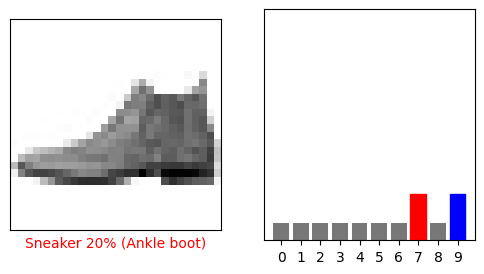

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

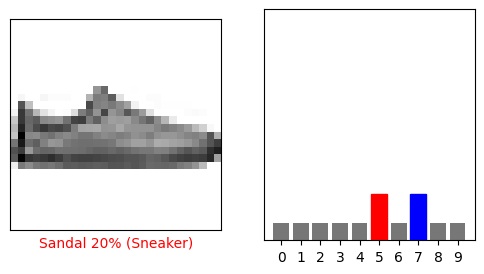

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

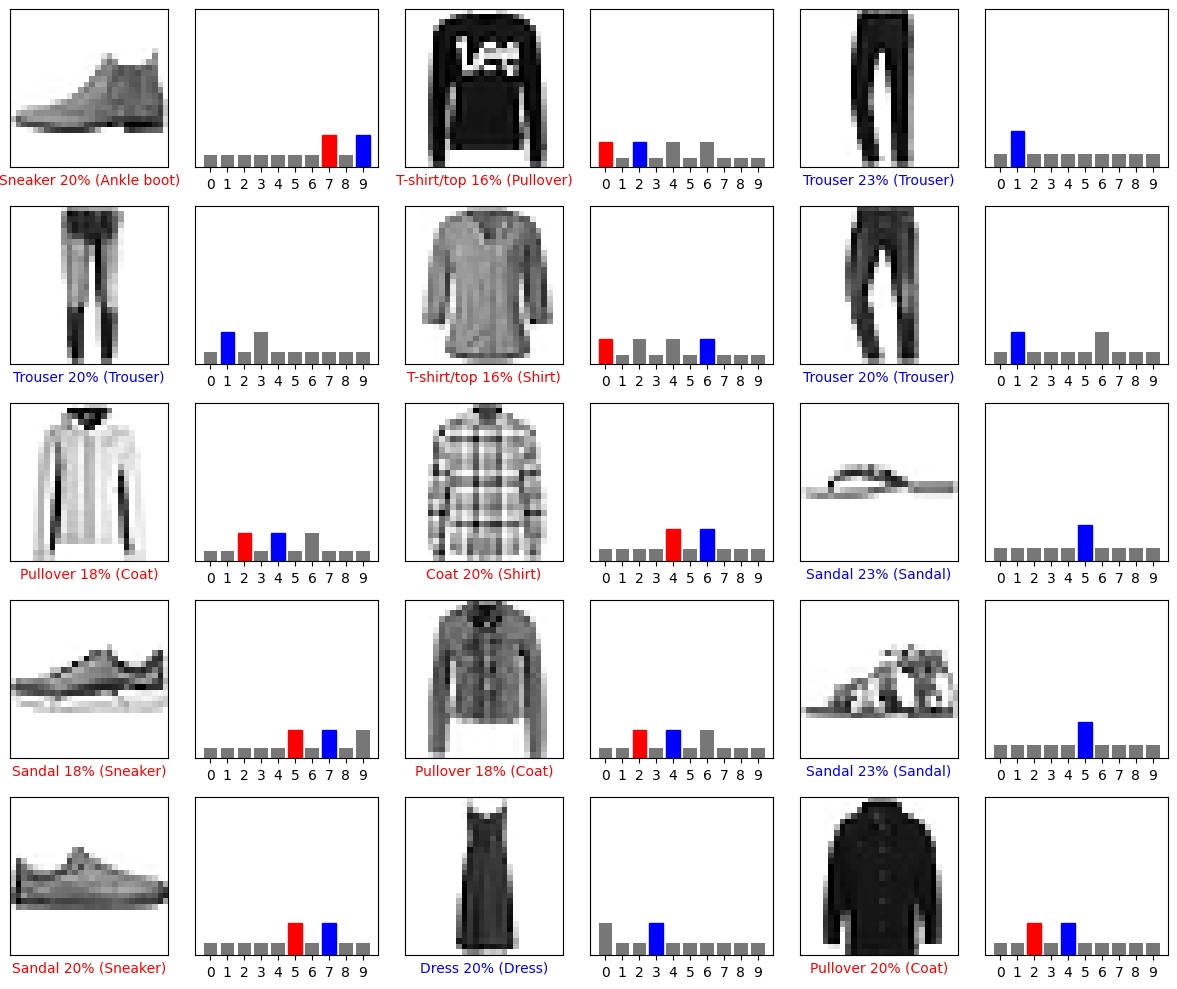

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()

## Performance Test

In [41]:
def get_model(hidden_layers=1):
    layers = []
    
    layers.append(keras.layers.Flatten(input_shape=(28, 28))) # input flatten layer
    
    for i in range(hidden_layers): # hidden layers
        layers.append(keras.layers.Dense(500, activation='relu'))
    
    layers.append(keras.layers.Dense(10, activation='sigmoid')) # output layer
    
    model = keras.Sequential(layers)
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

In [37]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7881 - loss: 0.5979
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8644 - loss: 0.3711
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8781 - loss: 0.3354
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8868 - loss: 0.3024
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8932 - loss: 0.2820


In [38]:
model.predict(test_images_scaled)[2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.1012689e-02, 9.9999923e-01, 1.0369780e-05, 9.9449037e-03,
       3.3498916e-03, 9.8534392e-12, 6.3219928e-04, 1.7579283e-16,
       3.3483149e-05, 1.6835799e-10], dtype=float32)

In [39]:
test_labels[2]

1

In [40]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### 5 Epochs performance comparison for 1 hidden layer

In [42]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model(1)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7955 - loss: 0.5851
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8671 - loss: 0.3675
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8793 - loss: 0.3259
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8918 - loss: 0.2949
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8936 - loss: 0.2804
43.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### 5 Epocs performance comparison with 5 hidden layers

In [43]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model(5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.7679 - loss: 0.6306
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8596 - loss: 0.3949
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8729 - loss: 0.3559
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8793 - loss: 0.3321
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8884 - loss: 0.3040
1min 47s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
